<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/ch04_03_Generative_Model_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03 Generative Model - DCGAN

* 날짜: 2022-08-09
* 이름: 박태현

## 학습내용
    - 딥러닝 생성모델에 대해 이해한다.
    - Deep Convolutional Generative Adversarial Networks 를 구현한다.

> https://arxiv.org/pdf/1406.2661.pdf



## 실습
---

### | **모델 구현**
<p  align='center'>
<img src ='https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0403-02.PNG?raw=true' width=800>
</p>

In [34]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils

def build_generator(z_dim = 64, img_shape = (28,28,1)):
  w, h, c = img_shape
  z = layers.Input(shape=[z_dim]) # 길이가 (z_dim)벡터
  y = layers.Dense( int(w/4) * int(h/4) * 8, activation = 'relu' )(z)
  y = layers.Reshape( [int(w/4),int(h/4), 8] )(y)
  
  y = layers.BatchNormalization()(y)
  y = layers.Conv2DTranspose(16, kernel_size=3, padding = 'same', strides=2, activation = 'relu')(y)
  y = layers.BatchNormalization()(y)
  y = layers.Conv2DTranspose(c, kernel_size=3, padding = 'same', strides=2, activation='sigmoid')(y)
  # 크기가 img_shape. (h,w,c) 텐서

  return models.Model(z, y, name = 'Generator')

def build_disc(img_shape = (28,28,1)):
  x = layers.Input(shape = img_shape)
  y = layers.Conv2D(16, kernel_size=3, strides = 2, padding = 'same', activation = 'relu')(x)
  y = layers.Dropout(.5)(y)
  y = layers.Conv2D(32, kernel_size=3, strides = 2, padding = 'same', activation = 'relu')(y)
  y = layers.Dropout(.5)(y)
  y = layers.Flatten()(y)
  y = layers.Dense(128, activation = 'relu')(y)
  y = layers.Dropout(.5)(y)
  y = layers.Dense(1, activation = 'sigmoid')(y)

  return models.Model(x, y, name = 'Discriminator')



def build_gan(z_dim, img_shape):
  gene = build_generator(z_dim, img_shape)
  disc = build_disc(img_shape)
  
  z = layers.Input(shape=[z_dim])
  fake_img = gene(z)
  logit = disc(fake_img)

  return models.Model(z, logit, name = 'GAN')

gan = build_gan(128, (32,32,3))
gan.summary()

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 128)]             0         
                                                                 
 Generator (Functional)      (None, 32, 32, 3)         67747     
                                                                 
 Discriminator (Functional)  (None, 1)                 267489    
                                                                 
Total params: 335,236
Trainable params: 335,188
Non-trainable params: 48
_________________________________________________________________


(1, 28, 28, 1)
[[0.49155867]]


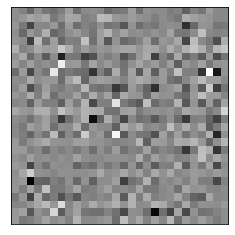

In [31]:
import matplotlib.pyplot as plt

z = tf.random.normal([1,64])
fake_img = g.predict(z)
print(fake_img.shape)
plt.imshow(fake_img[0,:,:,0], cmap = 'gray');plt.xticks([]);plt.yticks([])

logit = d.predict(fake_img)
print(logit)

### **| 학습**
<p  align='center'>
<img src ='https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0403-01.PNG?raw=true' width=600>
</p>